Instituto Tecnológico de Costa Rica \
Escuela de Computación

# Tarea 4
## Inteligencia Artificial

Prof. Luis Alexander Calvo Valverde

Fabricio Ceciliano Navarro - 2017111236 

Raquel Miranda Pérez - 2017239247

8 marzo 2020

# Conjunto de datos
El conjunto de datos a utilizar en la presente tarea, corresponde al **Abalone.csv**. En este se muestra información relevante sobre los moluscos conocidos como Orejas de Mar o Abalones. Dichos moluscos son muy estimados por su carne.
El conjunto de datos presenta varias columnas, las cuales se explican a continuación:

*   Sex (Sexo): Corresponde al sexo del molusco. Es nominal. Puede ser Male, Female o Infant.
*   Length (Longitud): Corresponde a la medida de la concha.
*   Diameter (Diámetro): Es perpendicular a la longitud.
*   Height (Altura): Se da cuando el abulón posee carne en la concha.
*   Whole weight (Peso total): Peso total del abulón.
*   Shucked (Despojado): Qué tan despojado de carne está.
*   Viscera weight (Peso de las vísceras): Peso intestinal.
*   Shell weight (Peso de la concha): Peso de la concha después de haber sido secada.
*   Rings (Anillo): Si se le suma 1.5 da la edad del molusco.



# 1. Carga de datos y visualización
El primer requerimiento consiste en cargar los datos y visualizar su contenido.
Como primer paso, se cargan los datos utilizando la biblioteca de Google Colab destinada para este fin.

In [332]:
from google.colab import files
files.upload()

Saving Abalone.csv to Abalone (13).csv


{'Abalone.csv': b'Sex,Length,Diameter,Height,Whole,Shucked,Viscera,Shellweight,Rings\r\nM,0.455,0.365,0.095,0.514,medio,0.101,0.15,15\r\nM,0.35,0.265,0.09,0.2255,medio,0.0485,0.07,7\r\nF,0.53,0.42,0.135,0.677,medio,0.1415,0.21,9\r\nM,0.44,0.365,0.125,0.516,medio,0.114,0.155,10\r\nI,0.33,0.255,0.08,0.205,medio,0.0395,0.055,7\r\nI,0.425,0.3,0.095,0.3515,medio,0.0775,0.12,8\r\nF,0.53,0.415,0.15,0.7775,medio,0.1415,0.33,20\r\nF,,0.425,0.125,0.768,medio,0.1495,0.26,16\r\nM,0.475,0.37,0.125,0.5095,medio,0.1125,0.165,9\r\nF,0.55,0.44,0.15,0.8945,medio,0.151,0.32,19\r\nF,0.525,0.38,0.14,0.6065,medio,0.1475,0.21,14\r\nM,0.43,0.35,0.11,0.406,medio,0.081,0.135,10\r\nM,0.49,0.38,0.135,0.5415,medio,0.095,0.19,11\r\nF,0.535,0.405,0.145,0.6845,medio,0.171,0.205,10\r\nF,,0.355,0.1,0.4755,medio,0.0805,0.185,10\r\nM,0.5,0.4,0.13,0.6645,medio,0.133,0.24,12\r\nI,0.355,0.28,0.085,0.2905,medio,0.0395,0.115,7\r\nF,0.44,0.34,0.1,0.451,medio,0.087,0.13,10\r\nM,0.365,0.295,0.08,0.2555,medio,0.043,0.1,7\r\nM,0.4

A continuación procederemos a realizar distintos métodos para visualizar el contenido del dataset.
Como primer paso, nos interesa saber la naturaleza de cada columna de datos, así como saber la cantidad de datos presentes en cada columna por si alguna presenta datos nulos.

In [0]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
sns.set(style='whitegrid', palette='colorblind')
import warnings
warnings.filterwarnings('ignore')
from pandas import *
from matplotlib import pyplot
from pandas.plotting import *
series = pd.read_csv('Abalone.csv')

In [343]:
series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
Sex;Length;Diameter;Height;Whole;Shucked;Viscera;Shellweight;Rings    1000 non-null object
dtypes: object(1)
memory usage: 7.9+ KB


Podemos observar que la mayoria de datos son de tipo *float* y que la mayoría de columnas posee 1000 entradas, con la excepción de la columna *Length* que posee 987.


Ahora, nos podría interesar ver el comportamiento de los datos por sexo, por lo que podemos utilizar un gráfico de barras para visualizar el comportamiento. En este caso, se muestra la cantidad de abalones masculinos, femeninos e infantes por cada cantidad de aros presentes en el conjunto de datos proporcionado.

In [331]:
series.groupby(['Rings','Sex']).size().unstack().plot(kind='bar',stacked=False,figsize=(15,6))
pyplot.show()

KeyError: ignored

Podemos observar que hay 3 valores atípicos sobre la cantidad de anillos, los cuales son -1300, 900 y 9000. Esto se podría tomar en cuenta para futuros análisis de dicha columna. Adicionalmente vemos que hay casi 60 abalones infantes con 7 aros, siendo este valor la moda en los infantes, además de haber aproximadamente 55 abalones femeninos con 10 aros así como 50 abalones masculinos con 9 y 10 aros.

Adicionalmente, puede interesar saber cuántos abalones de cada sexo hay.

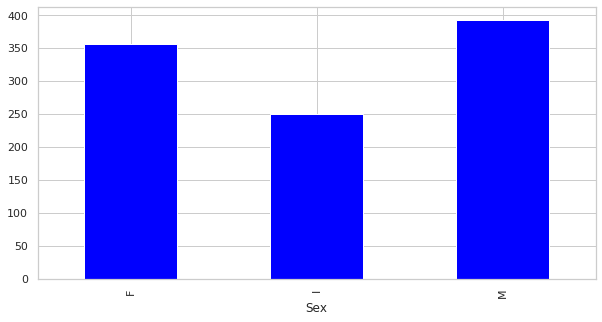

In [0]:
series.groupby('Sex')['Sex'].count().plot(kind='bar',color='blue',figsize=(10,5))
pyplot.show()

Puede que también sea útil ver la cantidad de abalones presentes categorizados por el término de despojado de carne en que se encuentran.

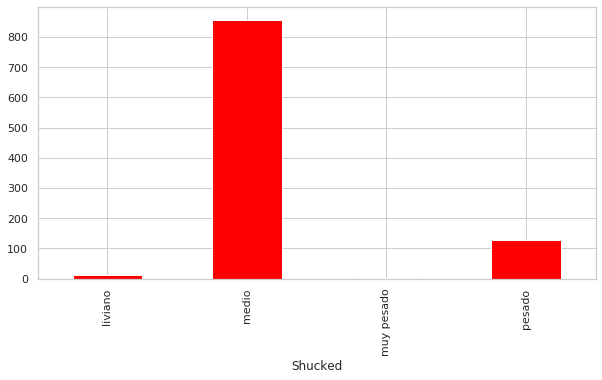

In [0]:
series.groupby('Shucked')['Shucked'].count().plot(kind='bar',color='red',figsize=(10,5))
pyplot.show()

Antes de comenzar a ver la relación que poseen los distintos atributos entre sí, principalmente en parejas de estos, puede ser útil mostrar una matriz de coeficientes de correlación como un mapa de calor. Para esto, se puede realizar lo siguiente:

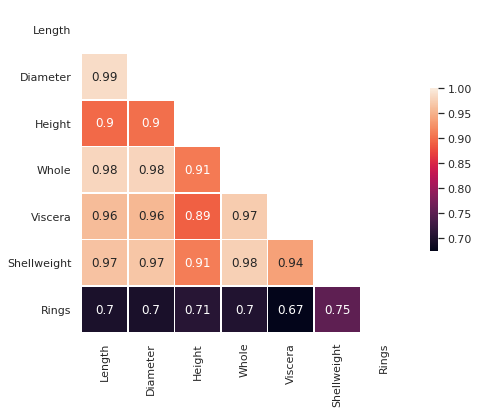

In [0]:
corr = series.corr('spearman')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = pyplot.subplots(figsize=(8, 6))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, annot=True)
pyplot.show()
pyplot.close()

Se puede observar que la mayoría de variables están altamente correlacionadas, pues poseen un r>0.7. Sin embargo, para este requerimiento haremos un enfoque comparando:
*   Height vs Whole.
*   Length vs Whole.
*   Diameter vs Whole.
*   Shellweight vs Whole.
*   Whole vs Rings.
*   Length vs Rings.
*   Rings vs Shellweight.


## Height vs Whole
Sería de esperar que conforme la altura de los abalones sea mayor, también suba su peso total, sin embargo, no sabemos si esto se comportará lineal o exponencialmente.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


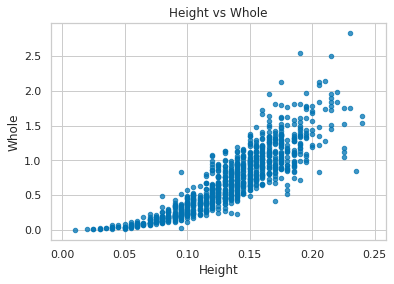

In [0]:
series.plot.scatter('Height','Whole',title="Height vs Whole",alpha=0.75)
pyplot.show()
pyplot.close()

De lo anterior podemos observar que hay un comportamiento exponencial, es decir, en cuanto más aumenta la altura, el peso total del abalón aumenta también.

## Length vs Whole
Esperaríamos que el peso completo del abalón aumente a medida que este come y agrega nuevos anillos de crecimiento, la longitud de su concha aumentará, por lo que aumentará su peso debido al aumento de tamaño en su concha.
Sin embargo, dado que no sabemos cómo se va a compartar este crecimiento, sería útil hacer una función que luego indique la función que sigue el comportamiento.

In [0]:
def lowess_scatter(data, x, y, jitter=0.0, skip_lowess=False):
    import statsmodels.api as sm
    if skip_lowess:
        fit = np.polyfit(data[x], data[y], 1)
        line_x = np.linspace(data[x].min(), data[x].max(), 10)
        line = np.poly1d(fit)
        line_y = list(map(line, line_x))
    else:
        lowess = sm.nonparametric.lowess(data[y], data[x], frac=.3)
        line_x = list(zip(*lowess))[0]
        line_y = list(zip(*lowess))[1]

    figure = pyplot.figure(figsize=(10, 6))
    axes = figure.add_subplot(1, 1, 1)
    xs = data[x]
    if jitter > 0.0:
        xs = data[x] + stats.norm.rvs(0, 0.5, data[x].size)

    axes.scatter(xs, data[y], marker="o", color="steelblue", alpha=0.5)
    axes.plot(line_x, line_y, color="DarkRed")
    title = "Gráfico de {0} vs. {1}".format(x, y)
    if not skip_lowess:
        title += " con LOESS"
    axes.set_title(title)
    axes.set_xlabel(x)
    axes.set_ylabel(y)
    axes.xaxis.grid(False)
    pyplot.show()

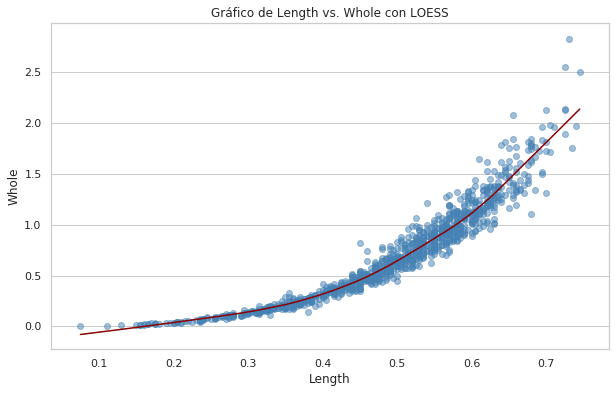

In [0]:
lowess_scatter(series,'Length','Whole')

Podemos observar que el comportamiento parece exponencial, tal y como realizamos la suposición anteriormente, en donde dijimos que el peso del abalón iba a aumentar si este aumentaba el largo de su concha.

## Diameter vs Whole
De manera similar al largo del abalón, y dado que el largo y el diámetro son perpendiculares entre sí, esperararíamos que el diámetro también se muestra exponencial y crezca conforme el abalón agrega nuevos aros de crecimiento.
Para verificar esto, podemos utilizar la función creada anteriormente.

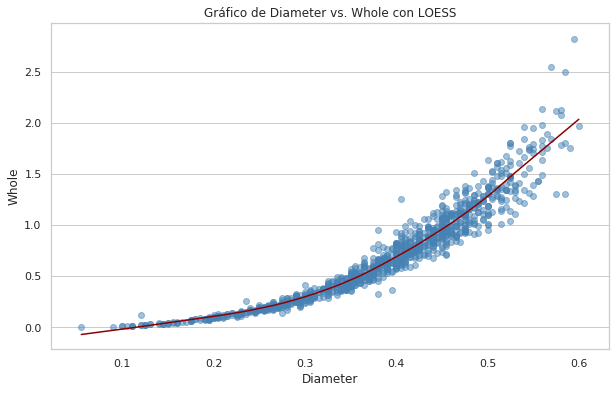

In [0]:
lowess_scatter(series,'Diameter','Whole')

Se puede observar que se muestra un comportamiento exponencial, similar a la comparación del Largo vs Peso total del abalón.

## Shellweight vs Whole.
También esperaríamos tener un comportamiento similar a los anteriores al comparar el peso de la concha con el peso total del abalón, pues posee un valor de correlación similar.

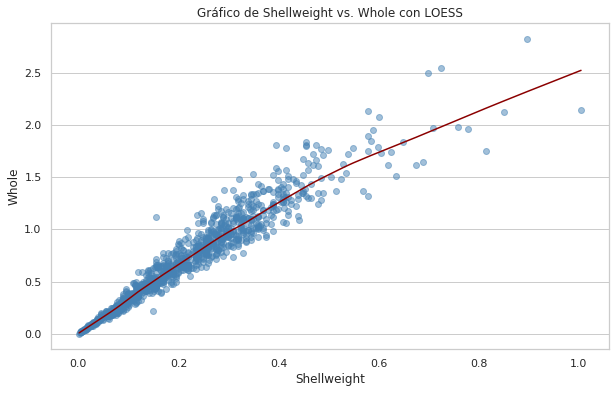

In [0]:
lowess_scatter(series,'Shellweight','Whole')

Para sorpresa, el comportamiento está vez es un poco lineal, lo cual significa que cuanto más pesada sea la concha, el peso total del abalón va a incrementar en una escala parecida.

## Whole vs Rings
Gracias al mapa de calor de correlación mostrado anteriormente, para este caso esperaríamos no tener una fuerte correlación, en comparación con los gráficos mostrados anteriormente. Esto puede deberse a que las distintas especias de abalones tienen tamaños diferentes, por lo que el peso total del abalón realmente no debe decirnos muchos sobre la cantidad de anillos presentes en el molusco. 
Acá es importante aclarar que se deben ignorar los valores atípicos presentes en Rings, por lo delimitaremos el gráfico a una cantida de aros entre 0 y 30. Para esto, utilizaremos la función anterior pero realizaremos la modificación para que los límites del eje Y estén entre 0 y 30.

In [0]:
def lowess_scatterYLimited(data, x, y, jitter=0.0, skip_lowess=False):
    import statsmodels.api as sm
    if skip_lowess:
        fit = np.polyfit(data[x], data[y], 1)
        line_x = np.linspace(data[x].min(), data[x].max(), 10)
        line = np.poly1d(fit)
        line_y = list(map(line, line_x))
    else:
        lowess = sm.nonparametric.lowess(data[y], data[x], frac=.3)
        line_x = list(zip(*lowess))[0]
        line_y = list(zip(*lowess))[1]

    figure = pyplot.figure(figsize=(10, 6))
    axes = figure.add_subplot(1, 1, 1)
    xs = data[x]
    if jitter > 0.0:
        xs = data[x] + stats.norm.rvs(0, 0.5, data[x].size)

    axes.scatter(xs, data[y], marker="o", color="steelblue", alpha=0.5)
    axes.plot(line_x, line_y, color="DarkRed")
    title = "Gráfico de {0} vs. {1}".format(x, y)
    if not skip_lowess:
        title += " con LOESS"
    axes.set_title(title)
    axes.set_xlabel(x)
    axes.set_ylabel(y)
    axes.set_ylim(0,30)
    axes.xaxis.grid(False)
    pyplot.show()

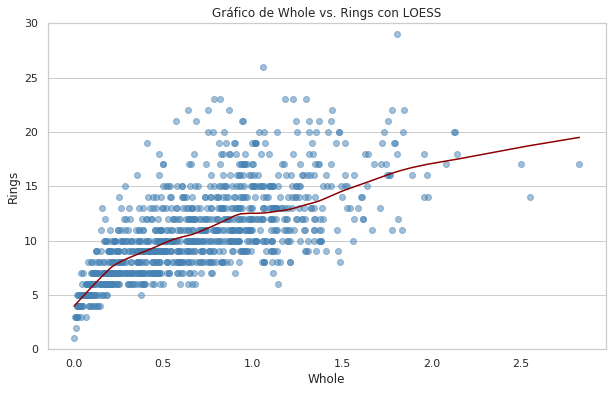

In [0]:
lowess_scatterYLimited(series,'Whole','Rings')

Vemos que el comportamiento de esta correlación es logarítmico, además, hay mucha dispersión de los datos en relación con la curva trazada, por lo que podemos afirmar que existe una débil correlación.

## Length vs Rings

Esperaríamos que cuanto más grandes sean sus anillos, más largo va a ser el abalón. Para esto, podemos utilizar la función anterior.

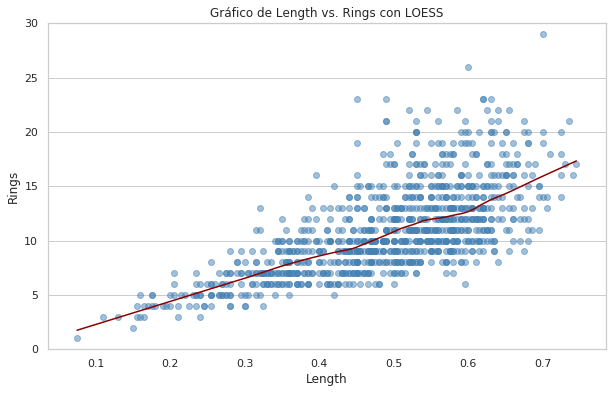

In [0]:
lowess_scatterYLimited(series,'Length','Rings')

En este caso el comportamiento es lineal, lo que indica que efectivamente existe cierta relación entre el tamaño del abalón y los anillos. Sin embargo, podemos observar que existe una dispersión de datos considerable.

## Rings vs Shellweight
Finalmente, vamos a analizar la correlación existente entre el tamaño de los anillo y el peso de la concha del molusco. Escogimos esto dado que es la correlación más alta existente entre una de las características del set de datos y los aros del abalón.
Acá podemos sospechar que el peso de la concha puede ser un indicador de la edad del abalón, pues, después de que se limpia el molusco y se deja sin sus vísceras, es más fácil aproximar el peso por cada anillo.

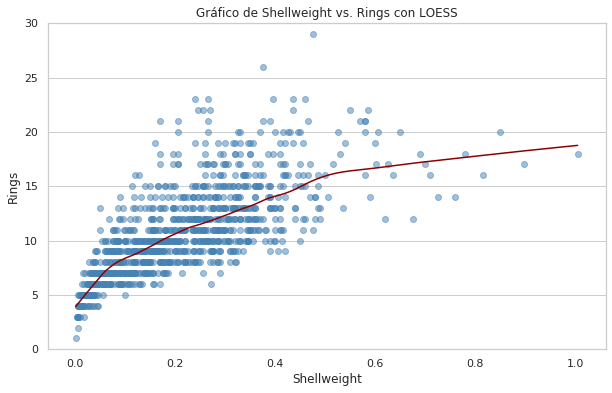

In [0]:
lowess_scatterYLimited(series, "Shellweight", "Rings")

Acá se puede observar una relación lineal algo débil, pero que igual presenta una alta correlación. Algo importante a rescatar es que si se toma como referencia un rango de anillos entre 5 y 15, puede ayudar a predecir de mejor manera la edad del molusco.

# 2. Preprocesamiento del atributo Shucked

Para el conjunto de datos Abalone el atributo Schuked, relacionado con la cantidad de carne que poseen los abalones, es necesario preprocesar estos registros de datos ordinales a datos númericos. Es decir, pasar de tener abalones catalogados con liviano, medio, pesado y muy pesado despojo de carne a tener un valor númerico que represente cada una de estas caracteristicas. Este preprocesamiento se puede hacer de varias maneras, en este caso, se formuló un método para recorrer la columna Shucked y asignarle un valor a cada categoría. 


De primera instancia, veamos las categorias en que se guardaron los registros del atributo Shucked y la cantidad de registros que hay por cada categoria

In [0]:
series.groupby('Shucked')['Shucked'].count()

Shucked
liviano        13
medio         857
muy pesado      2
pesado        128
Name: Shucked, dtype: int64

Ahora, haciendo uso del código de asignación de valor numérico, se cambiarán los valores "liviano", "medio", "pesado" y "muy pesado" por 1,2,3 y 4 respectivamente 

In [0]:
lista = series['Shucked']

i=0
while(i<len(lista)):
    if lista[i]=="liviano":
      lista[i]=1
    elif lista[i]=="medio":
      lista[i]=2
    elif lista[i]=="pesado":
      lista[i]=3
    elif lista[i]=="muy pesado":
      lista[i]=4
    
    i+=1


print(lista)
series['Shucked']=lista
print(series.head(50))

0      2
1      2
2      2
3      2
4      2
      ..
995    3
996    3
997    2
998    3
999    2
Name: Shucked, Length: 1000, dtype: object
   Sex  Length  Diameter  Height   Whole Shucked  Viscera  Shellweight  Rings
0    M   0.455     0.365   0.095  0.5140       2   0.1010        0.150     15
1    M   0.350     0.265   0.090  0.2255       2   0.0485        0.070      7
2    F   0.530     0.420   0.135  0.6770       2   0.1415        0.210      9
3    M   0.440     0.365   0.125  0.5160       2   0.1140        0.155     10
4    I   0.330     0.255   0.080  0.2050       2   0.0395        0.055      7
5    I   0.425     0.300   0.095  0.3515       2   0.0775        0.120      8
6    F   0.530     0.415   0.150  0.7775       2   0.1415        0.330     20
7    F     NaN     0.425   0.125  0.7680       2   0.1495        0.260     16
8    M   0.475     0.370   0.125  0.5095       2   0.1125        0.165      9
9    F   0.550     0.440   0.150  0.8945       2   0.1510        0.320     19


Como se puede observar, ahora los valores en la columna Shucked son valore numéricos.

# 3. Valores faltantes *Length*
En el conjunto de datos original, hay valores faltantes para el atributo Length, tal y como vimos al inicio del presente cuaderno.
Para rellenar esos valores, vamos a utilizar la media de los length restantes. Para vamos, debemos generar la media por columnas, además de indicar que queremos saltar aquellos valores nulos. Escogimos este método porque nos pareció adecuado dado no es un gran porcentaje de valores los que están nulos, además de que no queremos confundir algoritmos más adelante para el cálculo de histogramas, por ende, descartamos tanto ignorar los valores faltantes como llenar los valores constantes. Además, vimos anteriormente que los datos no se distribuyen tan torcidamente.

In [0]:
series.mean(axis=0,skipna=True)

Length          0.489630
Diameter        0.383400
Height          0.132970
Whole           0.711364
Viscera         0.154845
Shellweight     0.217592
Rings          19.441000
dtype: float64

Ahora que tenemos que la mediana de Length=0.489630, vamos almacenar dicho valor en una variable.

In [0]:
lengthMean = series.mean(axis=0,skipna=True).iloc[0]
print(lengthMean)

0.4896301925025328


Para verificar que efectivamente hay valores nulos, vamos a imprimir las primeras 10 filas del conjunto de datos original.

In [0]:
series.head(10)

Sex  Length  Diameter  Height   Whole Shucked  Viscera  Shellweight  Rings
0   M   0.455     0.365   0.095  0.5140       2   0.1010        0.150     15
1   M   0.350     0.265   0.090  0.2255       2   0.0485        0.070      7
2   F   0.530     0.420   0.135  0.6770       2   0.1415        0.210      9
3   M   0.440     0.365   0.125  0.5160       2   0.1140        0.155     10
4   I   0.330     0.255   0.080  0.2050       2   0.0395        0.055      7
5   I   0.425     0.300   0.095  0.3515       2   0.0775        0.120      8
6   F   0.530     0.415   0.150  0.7775       2   0.1415        0.330     20
7   F     NaN     0.425   0.125  0.7680       2   0.1495        0.260     16
8   M   0.475     0.370   0.125  0.5095       2   0.1125        0.165      9
9   F   0.550     0.440   0.150  0.8945       2   0.1510        0.320     19

Podemos observar que hay un valor nulo en la fila 7 y la columna Length.

Finalmente, procederemos a cambiar cada valor Na con el valor anterior. Además, imprimiremos la información de la nueva serie creada, para que se pueda observar que ahora todas las columnas poseen 1000 registros.

In [0]:
lengthFixedSeries = series
lengthFixedSeries['Length'].fillna(lengthMean,inplace=True)
lengthFixedSeries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
Sex            1000 non-null object
Length         1000 non-null float64
Diameter       1000 non-null float64
Height         1000 non-null float64
Whole          1000 non-null float64
Shucked        1000 non-null object
Viscera        1000 non-null float64
Shellweight    1000 non-null float64
Rings          1000 non-null int64
dtypes: float64(6), int64(1), object(2)
memory usage: 70.4+ KB


En el set de datos original, el primer valor nulo se daba en el registro de la fila 7, por lo que si ahora imprimos las primeras 10 filas, podemos observar que el valor ha sido reemplazado correctamente. 

In [0]:
lengthFixedSeries.head(10)

Sex   Length  Diameter  Height   Whole Shucked  Viscera  Shellweight  Rings
0   M  0.45500     0.365   0.095  0.5140       2   0.1010        0.150     15
1   M  0.35000     0.265   0.090  0.2255       2   0.0485        0.070      7
2   F  0.53000     0.420   0.135  0.6770       2   0.1415        0.210      9
3   M  0.44000     0.365   0.125  0.5160       2   0.1140        0.155     10
4   I  0.33000     0.255   0.080  0.2050       2   0.0395        0.055      7
5   I  0.42500     0.300   0.095  0.3515       2   0.0775        0.120      8
6   F  0.53000     0.415   0.150  0.7775       2   0.1415        0.330     20
7   F  0.48963     0.425   0.125  0.7680       2   0.1495        0.260     16
8   M  0.47500     0.370   0.125  0.5095       2   0.1125        0.165      9
9   F  0.55000     0.440   0.150  0.8945       2   0.1510        0.320     19

Finalmente, reasignamos los datos de la serie creada a la serie anterior para poder seguir utilizando la original durante el resto de la tarea.

In [0]:
series = lengthFixedSeries
series.head(10)

Sex   Length  Diameter  Height   Whole Shucked  Viscera  Shellweight  Rings
0   M  0.45500     0.365   0.095  0.5140       2   0.1010        0.150     15
1   M  0.35000     0.265   0.090  0.2255       2   0.0485        0.070      7
2   F  0.53000     0.420   0.135  0.6770       2   0.1415        0.210      9
3   M  0.44000     0.365   0.125  0.5160       2   0.1140        0.155     10
4   I  0.33000     0.255   0.080  0.2050       2   0.0395        0.055      7
5   I  0.42500     0.300   0.095  0.3515       2   0.0775        0.120      8
6   F  0.53000     0.415   0.150  0.7775       2   0.1415        0.330     20
7   F  0.48963     0.425   0.125  0.7680       2   0.1495        0.260     16
8   M  0.47500     0.370   0.125  0.5095       2   0.1125        0.165      9
9   F  0.55000     0.440   0.150  0.8945       2   0.1510        0.320     19

# 4. Valores atípicos del atributo Rings
Los valores atípicos representan un riesgo para el procesamiento de los datos debido a que estos son extremos respecto a los datos tipicos, que nos proveen una media certera. Si tenemos muchos valores atípicos en un dataset corremos el riesgo de que estos valores alteren la media y/o cualquier resultado al ejecutar funciones de análisis estadistico sobre los datos. 
Para efectos del dataset Abalone, como se observó en uno de los primero gráficos, se encuentran 3 valores atípicos muy grandes que serían: 9000,900 y -1300. Pero también se encuentran valores atípicos más cercanos a la media de los Rings (19.44), pero que no dejan de representar un riesgo, estos valores son: 29, 26, 23, 1 y 2. 
Para corregir esta problemática se hizo uso de los percentiles. Definiendo valores específicos para el rango de los perceptiles o cuartiles. En este caso de 1-99. El método percentile() se encarga de filtrar estos datos entre los cuartiles. 

In [0]:
P = np.percentile(series["Rings"], [1,99])
series = series[(series["Rings"] > P[0]) & (series["Rings"]  < P[1])]


print(series.head())
series.describe()

  Sex  Length  Diameter  Height   Whole Shucked  Viscera  Shellweight  Rings
0   M   0.455     0.365   0.095  0.5140       2   0.1010        0.150     15
1   M   0.350     0.265   0.090  0.2255       2   0.0485        0.070      7
2   F   0.530     0.420   0.135  0.6770       2   0.1415        0.210      9
3   M   0.440     0.365   0.125  0.5160       2   0.1140        0.155     10
4   I   0.330     0.255   0.080  0.2050       2   0.0395        0.055      7


Length    Diameter      Height  ...     Viscera  Shellweight       Rings
count  975.000000  975.000000  975.000000  ...  975.000000   975.000000  975.000000
mean     0.491236    0.384585    0.133144  ...    0.155136     0.217340   10.784615
std      0.115828    0.098720    0.037910  ...    0.096742     0.142126    3.774274
min      0.155000    0.105000    0.020000  ...    0.002500     0.005000    4.000000
25%      0.420000    0.325000    0.105000  ...    0.075250     0.105500    8.000000
50%      0.505000    0.400000    0.135000  ...    0.145500     0.200000   10.000000
75%      0.575000    0.455000    0.160000  ...    0.219500     0.300000   13.000000
max      0.745000    0.600000    0.240000  ...    0.541000     1.005000   21.000000

[8 rows x 7 columns]

Como se puede observar, al aplicar el método perceptile, este se encarga de normalizar los datos. Esto nos da como resultado una nueva media, un poco más aterrizada a los datos típicos. 

# 5. Preprocesamiento del atributo Sexo
El atributo "Sex", es nominal, por lo que si se desea analizar numéricamente no es posible. Es importante observar la cantidad de datos que hay para cada uno de los Sexos presentes en el conjunto de datos; F, M, I.

In [0]:
series.groupby('Sex')['Sex'].count()

Sex
F    347
I    243
M    385
Name: Sex, dtype: int64

Ahora bien, para preprocesar estos datos y convertirlos a valores numéricos, utilizaremos el mismo proceso que se realizó en el requerimiento 2, es decir, utilizando la función get_dummies, la cual, va a convertir este atributo en 3 columnas y va a asignar valores binarios, o sea, 1 en la columna del Sexo correspondiente y 0 en las otras 2 columnas.

In [0]:
series = pd.get_dummies(series,columns=['Sex'])
series.head(10)

Length  Diameter  Height   Whole  ... Rings  Sex_F  Sex_I  Sex_M
0  0.45500     0.365   0.095  0.5140  ...    15      0      0      1
1  0.35000     0.265   0.090  0.2255  ...     7      0      0      1
2  0.53000     0.420   0.135  0.6770  ...     9      1      0      0
3  0.44000     0.365   0.125  0.5160  ...    10      0      0      1
4  0.33000     0.255   0.080  0.2050  ...     7      0      1      0
5  0.42500     0.300   0.095  0.3515  ...     8      0      1      0
6  0.53000     0.415   0.150  0.7775  ...    20      1      0      0
7  0.48963     0.425   0.125  0.7680  ...    16      1      0      0
8  0.47500     0.370   0.125  0.5095  ...     9      0      0      1
9  0.55000     0.440   0.150  0.8945  ...    19      1      0      0

[10 rows x 11 columns]

# 6. Comportamiento y Transformación del atributo Shellweight

# 7. Histograma de cada variable
Una vez se ha realizado el preprocesamiento de los datos,deberíamos tener todos en valores numéricos. A continuación se realizarán los histogramas para cada variable/atributo.

## Atributo Sex


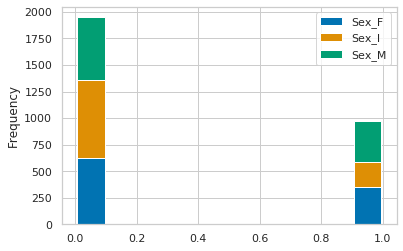

In [0]:
series[['Sex_F','Sex_I','Sex_M']].plot(kind='hist',rwidth=0.9,stacked=True)
pyplot.show()

Dado que transformamos el atributo nominal Sexo a valores numéricos, ahora tenemos 3 columnas para representar una variable categórica. El problema de esto radica en que al hacer el histograma, se van a tomar en cuenta hasta los valores que son 0, pues, las 3 columnas derivadas se utilizan de forma binaria. En el histograma anterior podemos observar que cuando el valor del sexo tiene 1, es decir, el abalón pertenece a ese sexo, el total de datos suma 1000, lo cual está correcto dado que es la cantidad total de datos presentes en el conjunto. 

Por otra parte, vemos que el valor 0 tiene una frecuencia de 2000. ¿Esto a qué se debe? Se debe a que si por ejemplo, un abalón no es ni masculino ni infante, a fuerza va a ser femenino, pero en este caso, el masculino e infante van a aportar un dato cada uno al valor de 0, mientras que el femenino va a aportar un valor al 1. Entonces esos 2000 datos se derivan del complemento del sexo de cada abalón. Esto no es relevante en el análisis de los datos, porque de igual manera el histograma muestra la frecuencia de cada sexo, que habíamos visto más arriba que en el caso del Femenino, son 357 datos y en el histograma la barra azul se encuentra hasta ese valor.

## Atributo Length

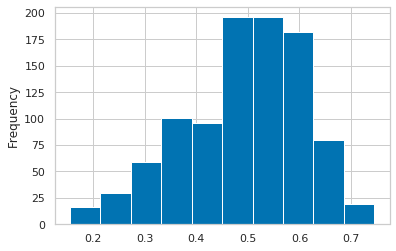

In [0]:
series['Length'].plot.hist(stacked=True)
pyplot.show()

Acá podemos ver que para el caso del largo de los abalones, la moda se encuentra entre 0.5 y 0.6.

## Atributo Diameter

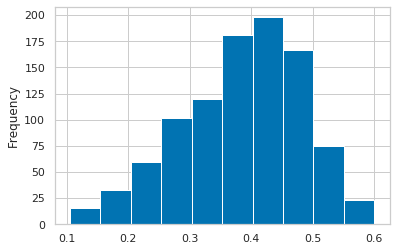

In [0]:
series['Diameter'].plot.hist(stacked=True)
pyplot.show()

Acá podemos ver que el diámetro se comporta de manera muy similar al largo, por lo que podemos asumir que estos datos con estrictamente correlacionados.

## Atributo Height

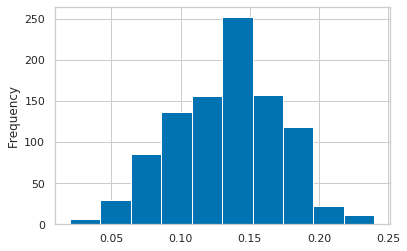

In [0]:
series['Height'].plot.hist(stacked=True)
pyplot.show()

Podemos ver que la frecuencia de los datos son similares, pues muchos se encuentran entre 0.10 y 0.20.

## Atributo Whole

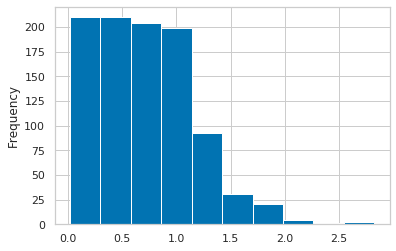

In [0]:
series['Whole'].plot.hist(stacked=True)
pyplot.show()

En los histrogamas mostrados anteriormente, se podía observar que el comportamiento de los datos era similar a una normal. En este caso eso no sucede. Podemos observar que cerca del 80% de los datos se encuentran entre un peso de 0.0 y 1.0.

## Atributo Viscera

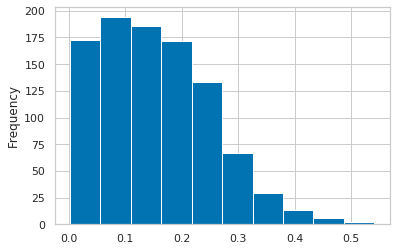

In [0]:
series['Viscera'].plot.hist(stacked=True)
pyplot.show()

El comportamiento de esta variable es similar al anterior. Esto puede signicar que el peso completo del abalón se da por el peso de las vísceras del mismo.

## Atributo Shellweight

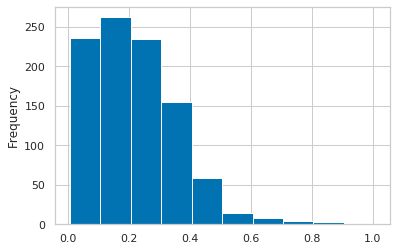

In [0]:
series['Shellweight'].plot.hist(stacked=True)
pyplot.show()

De igual forma que los 2 atributos anteriores, se puede observar que el peso de la concha afecta directamente en el peso total del abalón, por lo que, en teoría si se suma el peso de la concha con el de las vísceras, nos daría el peso total, justificando su comportamiento similar.

## Atributo Shucked

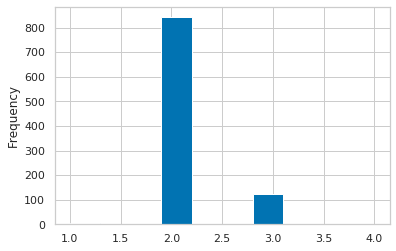

In [0]:
series['Shucked'].plot.hist(stacked=True)
pyplot.show()

Para este caso, en el requerimiento 2 se realizó la modificación de este atributo, pues, era de tipo nominal.
Podemos observar que casi el 80% de los datos están con un shucked de 2, es decir, en término medio, mientras que poco más de 10% con shucked de 3, es decir, en pesado.

# 8. Boxplot de cada variable 

## Atributo Sex

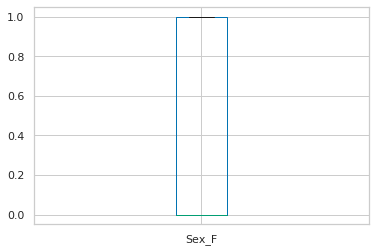

In [0]:
series['Sex_F'].plot(kind='box')
pyplot.show()

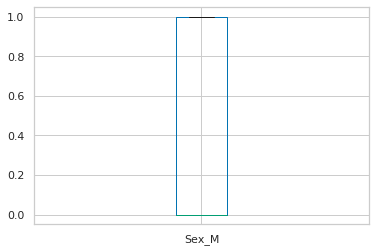

In [0]:
series['Sex_M'].plot(kind='box')
pyplot.show()

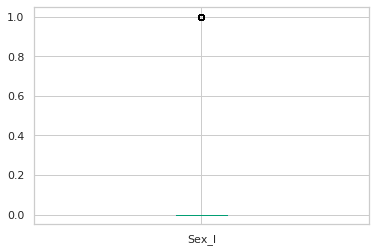

In [0]:
series['Sex_I'].plot(kind='box')
pyplot.show()

## Atributo Length

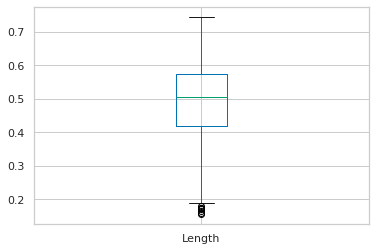

In [0]:
series['Length'].plot(kind='box')
pyplot.show()

## Atributo Diameter

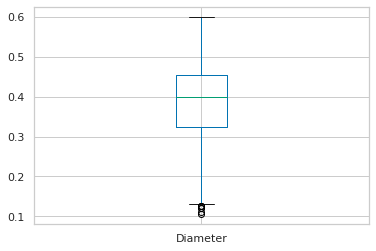

In [0]:
series['Diameter'].plot(kind='box')
pyplot.show()

## Atributo Height

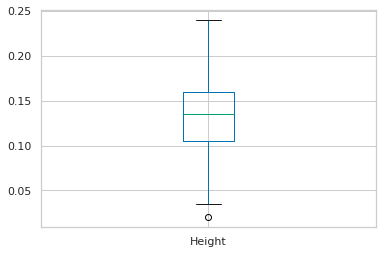

In [0]:
series['Height'].plot(kind='box')
pyplot.show()

## Atributo Whole

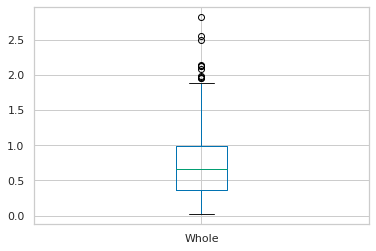

In [0]:
series['Whole'].plot(kind='box')
pyplot.show()

## Atributo Viscera

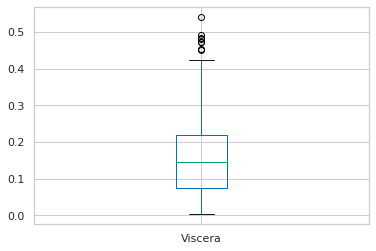

In [0]:
series['Viscera'].plot(kind='box')
pyplot.show()

## Atributo ShellWeight

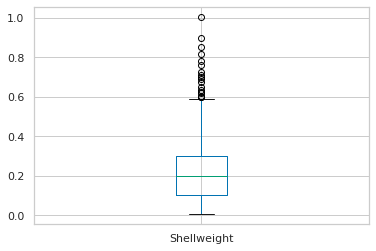

In [0]:
series['Shellweight'].plot(kind='box')
pyplot.show()

## Atributo Shucked

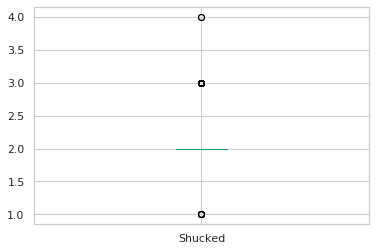

In [0]:
series['Shucked'].plot(kind='box')
pyplot.show()

##Atributo Rings

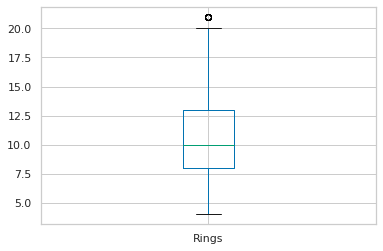

In [0]:
series['Rings'].plot(kind='box')
pyplot.show()

# 9. Min-max scaling a cada atributo

Para realizar el Min-Max scaling, se utilizará la biblioteca sklearn.
Como primer paso, copiamos el conjunto de datos para evitar que se modifique por error.

In [0]:
from sklearn.preprocessing import MinMaxScaler
dfTest = series

A continuación, creamos un scaler, que se va encargar de hacer el scaling, proporcionado por la biblioteca importada.

In [0]:
scaler = preprocessing.MinMaxScaler()

Seguidamente, realizamos el escalamiento para todas las columnas, e imprimimos las primeras 10 filas para verificar que sí funcionó.

In [0]:
dfTest[['Length','Diameter','Height','Whole','Shucked','Viscera','Shellweight','Rings','Sex_F','Sex_I','Sex_M']] = scaler.fit_transform(dfTest[['Length','Diameter','Height','Whole','Shucked','Viscera','Shellweight','Rings','Sex_F','Sex_I','Sex_M']])

In [0]:
dfTest.head(10)

Length  Diameter    Height     Whole  ...     Rings  Sex_F  Sex_I  Sex_M
0  0.508475  0.525253  0.340909  0.176816  ...  0.647059    0.0    0.0    1.0
1  0.330508  0.323232  0.318182  0.074074  ...  0.176471    0.0    0.0    1.0
2  0.635593  0.636364  0.522727  0.234865  ...  0.294118    1.0    0.0    0.0
3  0.483051  0.525253  0.477273  0.177528  ...  0.352941    0.0    0.0    1.0
4  0.296610  0.303030  0.272727  0.066774  ...  0.176471    0.0    1.0    0.0
5  0.457627  0.393939  0.340909  0.118946  ...  0.235294    0.0    1.0    0.0
6  0.635593  0.626263  0.590909  0.270655  ...  0.941176    1.0    0.0    0.0
7  0.567170  0.646465  0.477273  0.267272  ...  0.705882    1.0    0.0    0.0
8  0.542373  0.535354  0.477273  0.175214  ...  0.294118    0.0    0.0    1.0
9  0.669492  0.676768  0.590909  0.312322  ...  0.882353    1.0    0.0    0.0

[10 rows x 11 columns]

Finalmente, sobreeescribimos la serie escalada en la original

In [0]:
#series = dfTest

# 10. Guardado del archivo procesado
Para descargar y guardar el nuevo archivo que contiene el dataset procesado desde Google Colab, usamos la siguiente función. 

In [0]:
#series.to_csv('PREPROCESADOAbalone.csv')
#files.download('PREPROCESADOAbalone.csv') 


# Referencias bibliográficas
Desai, H. (2019). *EDA of Abalone Features*. Recuperado de: https://www.kaggle.com/hurshd0/eda-of-abalone-features

Kartikaybhutani. (s.f.). *Python | Pandas DataFrame.fillna() to replace Null values in dataframe*. Recuperado de: https://www.geeksforgeeks.org/python-pandas-dataframe-fillna-to-replace-null-values-in-dataframe/

UCI Machine Learning Repository. (s.f.). *Abalone Data Set*. Recuperado de: https://archive.ics.uci.edu/ml/datasets/Abalone



